# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from pprint import pprint
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
temps = []
humid = []
clouds = []
winds = []
lats = []
lons = []
names = []

# Build query URL
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    response = requests.get(query_url)
    if response.status_code == 200:
        response = response.json()
        temps.append(response["main"]["temp"])
        humid.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        winds.append(response["wind"]["speed"])
        lats.append(response["coord"]["lat"])
        lons.append(response["coord"]["lon"])
        names.append(response["name"])

In [4]:
weatherpy = pd.DataFrame({"City": names,
                        "Temperature (F)": temps,
                        "Humidity (%)": humid,
                        "Cloud Coverage (%)": clouds,
                        "Wind Speed (mph)": winds,
                        "Latitude": lats, 
                        "Longitude": lons
                       })
weatherpy.head()

,City,Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),Latitude,Longitude
0,Ulladulla,63.05,32,0,5.82,-35.35,150.47
1,Busselton,72.61,57,92,9.22,-33.65,115.33
2,Newton,42.87,41,73,12.75,42.34,-71.21
3,Los Llanos de Aridane,68.00,72,90,9.17,28.66,-17.92
4,Faanui,82.60,76,54,14.23,-16.48,-151.75


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# save to csv file
weatherpy. to_csv("weatherpy.csv", encoding='utf-8', index=False)

# Display the city weather data frame
weatherpy.head(10)

,City,Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),Latitude,Longitude
0,Ulladulla,63.05,32,0,5.82,-35.35,150.47
1,Busselton,72.61,57,92,9.22,-33.65,115.33
2,Newton,42.87,41,73,12.75,42.34,-71.21
3,Los Llanos de Aridane,68.00,72,90,9.17,28.66,-17.92
4,Faanui,82.60,76,54,14.23,-16.48,-151.75
5,Albany,37.98,38,1,9.17,42.60,-73.97
6,Voyvozh,21.40,94,100,3.15,62.89,54.96
7,Tiarei,86.00,66,97,9.17,-17.53,-149.33
8,Padang,80.42,74,85,4.76,-0.95,100.35
9,Mthatha,69.80,52,97,2.24,-31.59,28.78


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

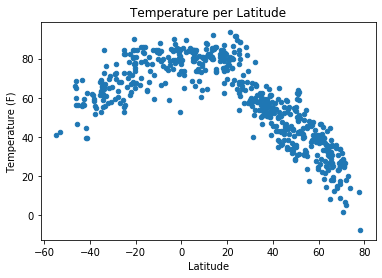

In [6]:
# df.plot.scatter(x='a', y='b');
weatherpy.plot.scatter(x="Latitude", y="Temperature (F)", title="Temperature per Latitude")
#SAVE TO PNG
plt.savefig("LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

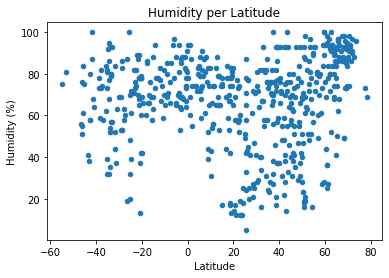

In [7]:
weatherpy.plot.scatter(x="Latitude", y="Humidity (%)", title="Humidity per Latitude")
plt.savefig("LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

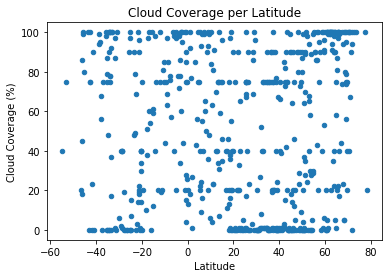

In [8]:
weatherpy.plot.scatter(x="Latitude", y="Cloud Coverage (%)", title="Cloud Coverage per Latitude")

plt.savefig("LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

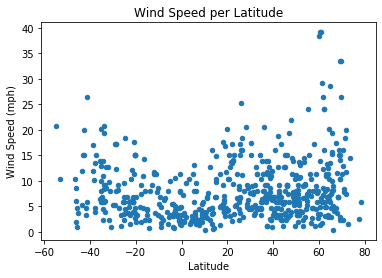

In [9]:
weatherpy.plot.scatter(x="Latitude", y="Wind Speed (mph)", title="Wind Speed per Latitude")
plt.savefig("LatVsWind.png")
plt.show()

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots

def plotLinearRegression(x_data,y_data,x_label,y_label,label_post,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
    print(f"The r-squared is: {rvalue}")
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_data,y_data)
    plt.plot(x_data,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(f"{ifig}.png")
    plt.show()

In [11]:
# Create Northern and Southern Hemisphere DataFrames
nothern = weatherpy.loc[weatherpy["Latitude"] >= 0.0]
nothern.reset_index(inplace=True)

southern = weatherpy.loc[weatherpy["Latitude"] < 0.0]
southern.reset_index(inplace=True)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9064786526246995


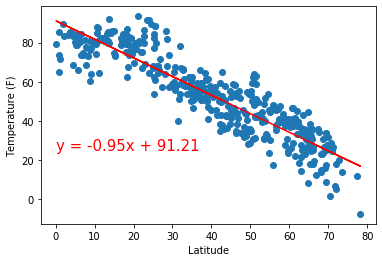

In [14]:
xlabel = "Latitude"
ylabel = "Temperature (F)"
lblpos = (0,25)

plotLinearRegression(nothern[xlabel],nothern[ylabel],xlabel,ylabel,lblpos,5  )

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6974769359784521


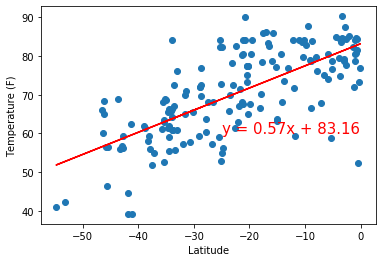

In [15]:
xlabel = "Latitude"
ylabel = "Temperature (F)"
lblpos = (-25,60)

plotLinearRegression(southern[xlabel],southern[ylabel],xlabel,ylabel,lblpos,5  )

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.22620328832896616


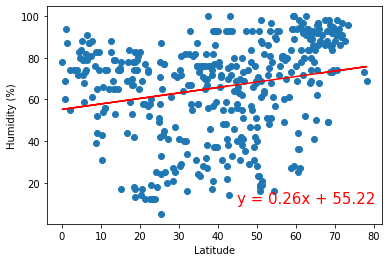

In [16]:
xlabel = "Latitude"
ylabel = "Humidity (%)"
lblpos = (45,10)

plotLinearRegression(nothern[xlabel],nothern[ylabel],xlabel,ylabel,lblpos,7  )

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.22698845018849836


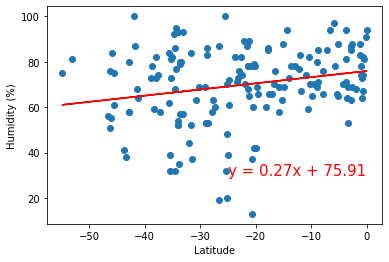

In [17]:
xlabel = "Latitude"
ylabel = "Humidity (%)"
lblpos = (-25,30)

plotLinearRegression(southern[xlabel],southern[ylabel],xlabel,ylabel,lblpos,8  )

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.18805080856245648


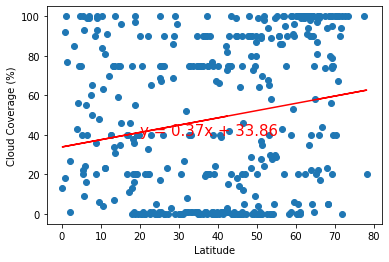

In [19]:
xlabel = "Latitude"
ylabel = "Cloud Coverage (%)"
lblpos = (20,40)

plotLinearRegression(nothern[xlabel],nothern[ylabel],xlabel,ylabel,lblpos,7  )

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08873434770353457


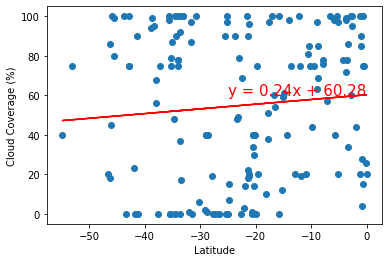

In [20]:
xlabel = "Latitude"
ylabel = "Cloud Coverage (%)"
lblpos = (-25,60)

plotLinearRegression(southern[xlabel],southern[ylabel],xlabel,ylabel,lblpos,5  )

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.25337703349571594


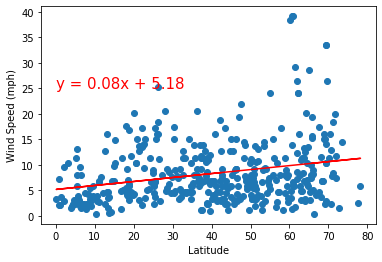

In [22]:
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
lblpos = (0,25)

plotLinearRegression(nothern[xlabel],nothern[ylabel],xlabel,ylabel,lblpos,10  )

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3886591534762258


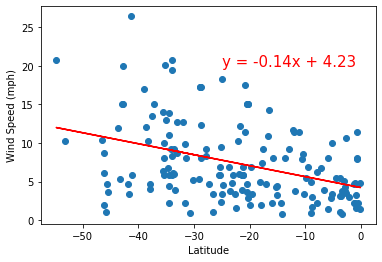

In [23]:
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
lblpos = (-25,20)

plotLinearRegression(southern[xlabel],southern[ylabel],xlabel,ylabel,lblpos,5  )